# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [99]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [100]:
temp1 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv')
temp2 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv')
temp = pd.concat([temp1, temp2])
temp

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [101]:
FIPS = pd.read_csv(' https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv')
station_metadata = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv')

temp['FIPS 10-4'] = temp['ID'].str[0:2]

station_m = station_metadata.drop(['STNELEV'], axis = 1)
station = station_m.rename(columns={"NAME": "Airport"})


In [102]:
df = pd.merge(temp, FIPS, on=['FIPS 10-4'])

df = df.drop(['FIPS 10-4', 'ISO 3166'], axis=1)

df = df.set_index(keys = ['ID', 'Year', 'Name'])

df = df.stack()

df = df.reset_index()

df = df.rename(columns = {'level_3':'Month', 0:'Temperature (C)'})

df['Month'] = df['Month'].str[5:].astype(int)

In [103]:
df = pd.merge(df, station, on = ['ID'])
df

,ID,Year,Name,Month,Temperature (C),LATITUDE,LONGITUDE,Airport
0,AG000060390,1901,Algeria,1,1034.0,36.7167,3.250,ALGER_DAR_EL_BEIDA
1,AG000060390,1901,Algeria,2,844.0,36.7167,3.250,ALGER_DAR_EL_BEIDA
2,AG000060390,1901,Algeria,3,1164.0,36.7167,3.250,ALGER_DAR_EL_BEIDA
3,AG000060390,1901,Algeria,4,1534.0,36.7167,3.250,ALGER_DAR_EL_BEIDA
4,AG000060390,1901,Algeria,5,1564.0,36.7167,3.250,ALGER_DAR_EL_BEIDA
...,...,...,...,...,...,...,...,...
1899682,ZAM00067663,2012,Zambia,4,1970.0,-14.4500,28.467,KABWE_MILLIKEN
1899683,ZAM00067663,2012,Zambia,5,1850.0,-14.4500,28.467,KABWE_MILLIKEN
1899684,ZAM00067663,2012,Zambia,6,1750.0,-14.4500,28.467,KABWE_MILLIKEN
1899685,ZAM00067663,2015,Zambia,12,2485.0,-14.4500,28.467,KABWE_MILLIKEN


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [104]:
def query_climate(df = df, country = 'Algeria', year_begin = 1901, year_end = 1960, month = 1):
    rt_df = df[df['Name'] == country]
    rt_df = rt_df[(rt_df['Year'] >= year_begin) & (rt_df['Year'] <= year_end) ]
    rt_df = rt_df[rt_df['Month'] == month]
    rt_df['Country'] = rt_df['Name']
    rt_df = rt_df.drop(['Name'], axis=1)
    rt_df['NAME'] = rt_df['Airport']
    rt_df['Temp'] = rt_df['Temperature (C)']/100
    rt_df = rt_df.drop(['Airport','ID', 'Temperature (C)'], axis=1)
    rt_df = rt_df.reindex(columns = ['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp'])
    return rt_df

x = query_climate(df, 'India')
x

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
442659,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
442671,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
442683,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
442695,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
442707,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
451686,DARJEELING,27.05,88.27,India,1906,1,5.60
451698,DARJEELING,27.05,88.27,India,1907,1,8.05
451710,DARJEELING,27.05,88.27,India,1908,1,6.80
451722,DARJEELING,27.05,88.27,India,1909,1,6.65


Run this example and check if you get the correct result, your obtained dataframe looks like:

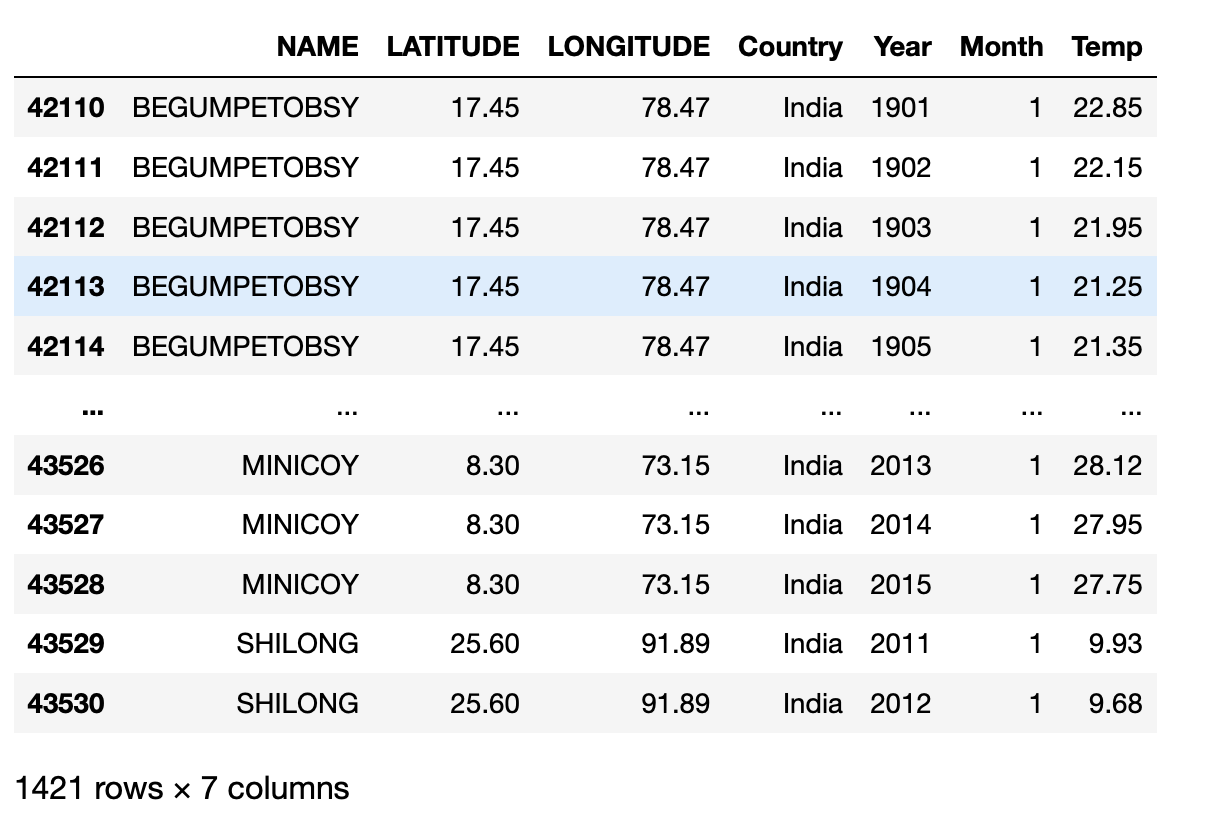

In [105]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
442659,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
442671,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
442683,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
442695,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
442707,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
458428,MINICOY,8.30,73.15,India,2014,1,27.95
458440,MINICOY,8.30,73.15,India,2015,1,27.75
458444,ALLAHABAD_BAMHRAULI,25.50,81.90,India,2013,1,15.30
458454,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

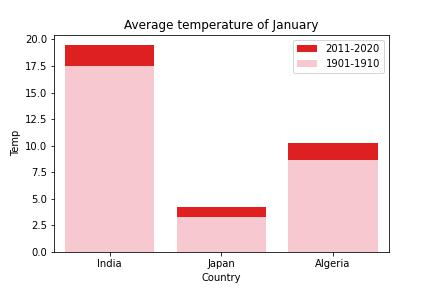

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

In [106]:
def query_climate_new(df = df, country = ['Algeria', 'India', 'Japan', 'Egypt'], year_ranges = [[1901,1910],[2011,2020]], Month = 1):
    rt_df = df[(df['Name'] == country[0]) | (df['Name'] == country[1]) | (df['Name'] == country[2]) | (df['Name'] == country[3])]
    rt_df = rt_df[rt_df['Month'] == Month]
    rt_df = rt_df[((rt_df['Year'] >= year_ranges[0][0]) & (rt_df['Year'] <= year_ranges[0][1]))| (rt_df['Year'] >= year_ranges[1][0]) & (rt_df['Year'] <= year_ranges[1][1])]
    rt_df['Year Range'] = (rt_df['Year']>= year_ranges[0][0]) & (rt_df['Year']<= year_ranges[0][1])
    rt_df['Year Range'] = rt_df['Year Range'].map({True : str(year_ranges[0][0]) + ' - ' + str(year_ranges[0][1]), False: str(year_ranges[1][0]) + ' - ' + str(year_ranges[1][1])})
    rt_df['Country'] = rt_df['Name']
    rt_df = rt_df.drop(['Name'], axis=1)
    rt_df['NAME'] = rt_df['Airport']
    rt_df['Temp'] = rt_df['Temperature (C)']/100
    rt_df = rt_df.drop(['Airport','ID', 'Temperature (C)'], axis=1)
    rt_df = rt_df.reindex(columns = ['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp', 'Year Range'])
    return rt_df

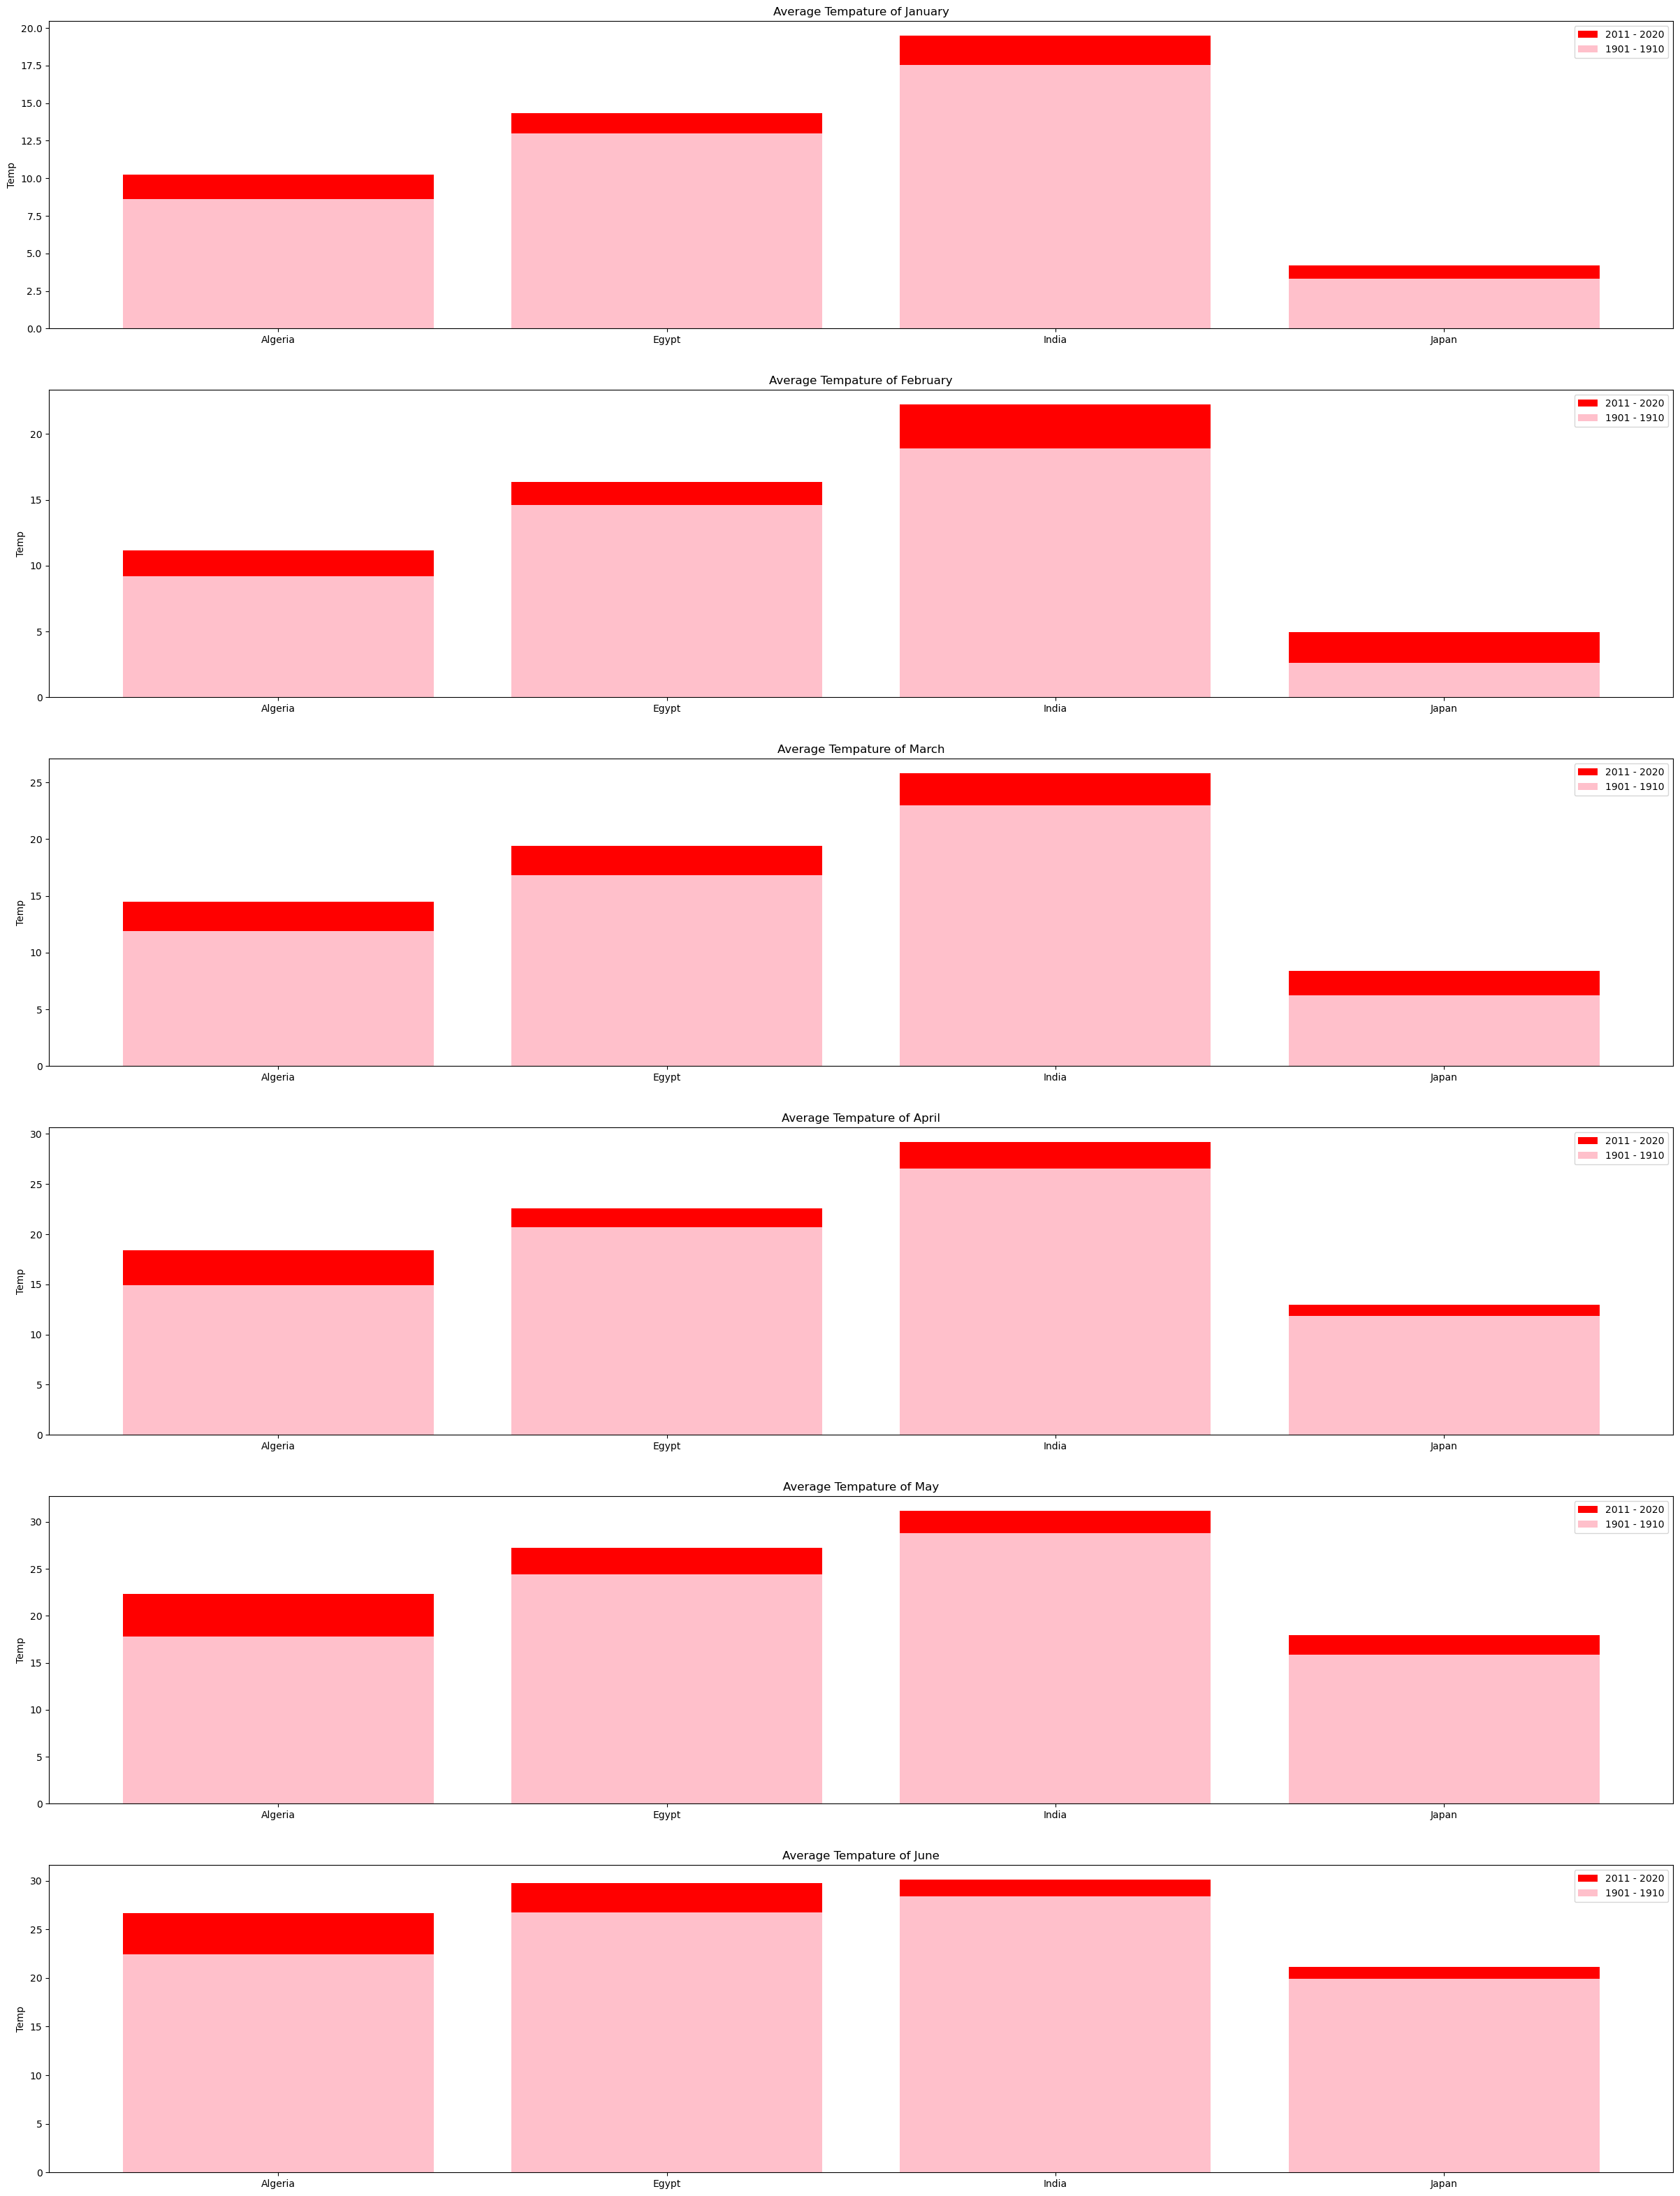

In [107]:
import seaborn as sns
fig, ax = plt.subplots(6, figsize = (30,40))
D = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June'
    
    }

for i in range(6):
    x = query_climate_new(Month = i+1)
    x_new = x.groupby(['Country', 'Year Range'])['Temp'].mean().unstack().fillna(0)
    ax[i].bar(x_new.index, x_new['2011 - 2020'], label='2011 - 2020', color = 'red')
    ax[i].bar(x_new.index, x_new['1901 - 1910'], label='1901 - 1910', color = 'pink')
    month = D.get((i+1))
    ax[i].set_ylabel('Temp')
    ax[i].set_title('Average Tempature of ' + month)
    ax[i].legend()

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In [108]:
import plotly.express as px
import plotly.graph_objects as go

test = df[df['Year'] <= 1910]
test = test[test["Name"].str[0]=='A']
test['Date'] = test['Year'].astype(str) + '-' + test['Month'].astype(str)
test['Date'] = pd.to_datetime(test['Date'])
test = test.groupby(['Name','Date'])[['Temperature (C)', 'Month']].mean()/100
test['Month'] = test['Month']*100
test['Month'] = pd.to_numeric(test['Month'], downcast = 'integer')
test = test.reset_index()
px.line(test, x = 'Date', y = 'Temperature (C)', color = 'Name', animation_frame = 'Month' )

"""
Through this model we can compare the average temperature in degrees celcius for every year 
between 1901 and 1910 specifically by each month. We are also able to see how average tempatures change across
the course of a year. The y-xis the tempature in degrees celcius, line colors are determined by the country.
The x-axis is the year, and the animation frame allows you to move through different months. We are able to 
see how average tempatures in specific months have changed across this 10 year period. I noticed that Anartica experienced
their warmest tempatures during October through December. Tempatures varied throughout this 10 year period, none
of the lines showed a sharp increase or decrease through the 10 year period.
"""

'\nThrough this model we can compare the average temperature in degrees celcius for every year \nbetween 1901 and 1910 specifically by each month. We are also able to see how average tempatures change across\nthe course of a year. The y-xis the tempature in degrees celcius, line colors are determined by the country.\nThe x-axis is the year, and the animation frame allows you to move through different months. We are able to \nsee how average tempatures in specific months have changed across this 10 year period. I noticed that Anartica experienced\ntheir warmest tempatures during October through December. Tempatures varied throughout this 10 year period, none\nof the lines showed a sharp increase or decrease through the 10 year period.\n'

'\nThis boxplot tracks the average tempature in 4 different countries in the month of January.\nThere are two boxplot for each country, for each year range. Across these 4 countries\nwe consisently see an increase in their average tempatures from 1901 to 2020. The difference\nis significant with higher means as well as first second and third quartiles. The y-axis plots the temperature\nin degrees celcius and the x-axis plots the country. This plot is specifically the month of January.\n'

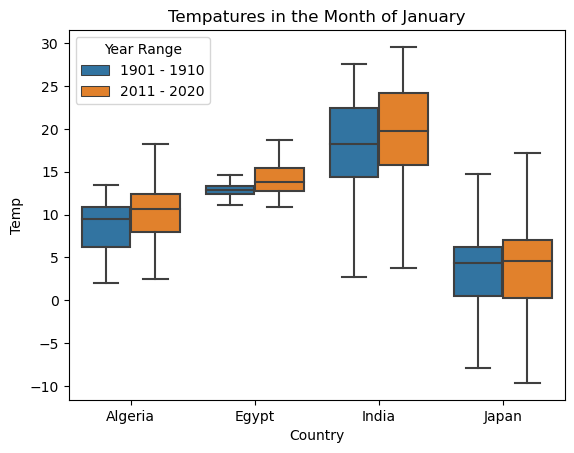

In [109]:
import plotly.express as px
import plotly.graph_objects as go

df_ = query_climate_new()

sns.boxplot(data = df_, x = 'Country', y = 'Temp', hue = 'Year Range', showfliers = False).set_title('Tempatures in the Month of January')
"""
This boxplot tracks the average tempature in 4 different countries in the month of January.
There are two boxplot for each country, for each year range. Across these 4 countries
we consisently see an increase in their average tempatures from 1901 to 2020. The difference
is significant with higher means as well as first second and third quartiles. The y-axis plots the temperature
in degrees celcius and the x-axis plots the country. This plot is specifically the month of January.
"""

In [110]:
test1 = df
test1 = test1[test1['Temperature (C)'] >= 0]
country = ['Egypt', 'China', 'Japan', 'Russia']
test1 = test1[(test1['Name'] == country[0]) | (test1['Name'] == country[1]) | (test1['Name'] == country[2]) | (test1['Name'] == country[3])]
test1['Year Range'] = (test1['Year']>= 1901) & (test1['Year']<= 1910)
test1['Year Range'] = test1['Year Range'].map({True : str(1901) + ' - ' + str(1910), False: str(2011) + ' - ' + str(2020)})
test1 = test1.groupby(['Name', 'Year Range'])[['Temperature (C)']].mean()/100
test1 = test1.reset_index()

px.bar(test1, x='Name', y='Temperature (C)', color='Name', animation_frame = 'Year Range').update_xaxes(categoryorder = 'total ascending')

"""
This barplot allows us to see the change in average temperature in 4 different countries, it compares
the decade at the start of the 1900s and the decade following 2010. From the visualization we see
an increase in temperatures in Egypt while a decrease in temperatures in China. Japan also sees increase in temperatures
while Russia has almost the same average temperature.
"""

'\nThis barplot allows us to see the change in average temperature in 4 different countries, it compares\nthe decade at the start of the 1900s and the decade following 2010. From the visualization we see\nan increase in temperatures in Egypt while a decrease in temperatures in China. Japan also sees increase in temperatures\nwhile Russia has almost the same average temperature.\n'

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell